In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
df = pd.DataFrame({'idx':[],
                    'block':[],
                    'stimuli':[],
                    'reward':[],
                    'response':[],
                    'trialtype':[],
                    })

In [31]:
env_action_space = [0,1]

env_stimuli_choices = [[x, y] for x in ['yellow', 'green', 'red', 'blue'] for y in ['yellow', 'green', 'red', 'blue'] if not x == y]
env_stimuli_decision = [x for i in range(6) for x in [['yellow', 'green'], ['red', 'blue'], ['green', 'yellow'], ['blue', 'red']]]
env_stimuli_catch = [x for i in range(2) for x in env_stimuli_choices if x not in env_stimuli_decision]
env_stimuli_episode = env_stimuli_decision + env_stimuli_catch


env_reward_value = {'yellow': [20, 20], 'green': [0, 40], 'red': [60, 60], 'blue': [40, 80]}
env_reward_prob = {'yellow': [0.5, 0.5], 'green': [0.5, 0.5], 'red': [0.5, 0.5], 'blue': [0.5, 0.5]}


env_current_step = 0

env_episode_nstep = 40

env_reset_step = False 

agent_sum_reward = 0

agent_each_reward = [0,0,0,0]

nidx = 28

nblock = 6

nepisode = nidx*nblock 

episode_reward = []

agent_expectation_yellow = []
agent_expectation_green = [] 
agent_expectation_red = []
agent_expectation_blue = []

agent_prob_yellow = []
agent_prob_green = []
agent_prob_red = []
agent_prob_blue = []


agent_high_risky = []
agent_low_risky = []

agent_expectation = {'yellow': 0, 'green': 0, 'red': 0, 'blue': 0}

agent_current_prob = {'yellow': [0, 0], 'green': [0, 0], 'red': [0, 0], 'blue': [0, 0]}

agent_current_count = {'yellow': [0, 0], 'green': [0, 0], 'red': [0, 0], 'blue': [0, 0]}



for idx in range(nidx):
    for block in range(nblock):
        epsilon = 0.4

        env_current_step = 0 
        
        agent_current_step = env_current_step

        
        agent_episode_yellow = 0
        agent_episode_green = 0
        agent_episode_red = 0 
        agent_episode_blue = 0

        agent_episode_high_risky = 0
        agent_episode_low_risky = 0

        np.random.shuffle(env_stimuli_episode)
        
        for i in range(env_episode_nstep):
            
            if env_reset_step == True:
                env_current_step = 0 

                agent_current_step = env_current_step

                agent_sum_reward = 0

            
            
            env_observation = env_stimuli_episode[env_current_step]
            
            env_current_step += 1 
            
            agent_current_step = env_current_step
            
            
            if env_current_step  == env_episode_nstep:

                env_reset_step = True
            
            else:
                
                env_reset_step = False
            # make a choice
            if np.random.random() < epsilon:
                
                agent_current_choice = np.random.randint(2)

            else:
                sq = np.mean([agent_expectation[env_observation[0]], agent_expectation[env_observation[1]]])

                # # Prospect theory mapping

                # weight_loss = 2*(1/(1+np.exp(-sq/10))-0.05 )

                # weight_gain = np.log((sq+10)/10)

                # Tri-reference point theory mapping

                weight_loss = 1/(1+np.exp(-((sq+40)/5)))-1

                weight_gain = 1/(1+np.exp(-((sq-40)/5)))


                agent_sub_expectation_left = (env_reward_value[env_observation[0]][0]*env_reward_prob[env_observation[0]][0] - sq)*weight_loss + (env_reward_value[env_observation[0]][1]*env_reward_prob[env_observation[0]][1] - sq)*weight_gain

                agent_sub_expectation_right = (env_reward_value[env_observation[1]][0]*env_reward_prob[env_observation[1]][0] - sq)*weight_loss + (env_reward_value[env_observation[1]][1]*env_reward_prob[env_observation[1]][1] - sq)*weight_gain

                if agent_sub_expectation_left >= agent_sub_expectation_right:
                    agent_current_choice = 0
                else:
                    agent_current_choice = 1

                #print(env_observation, agent_current_choice, sq,"|",env_reward_value[env_observation[0]][0] - sq,env_reward_value[env_observation[0]][1] - sq,env_reward_value[env_observation[1]][0] - sq,env_reward_value[env_observation[1]][1] - sq,'|',agent_sub_expectation_left,agent_sub_expectation_right)
            # record choice

            if env_observation[agent_current_choice] == 'yellow':
                agent_episode_yellow += 1
            elif env_observation[agent_current_choice] == 'green':
                agent_episode_green += 1
            elif env_observation[agent_current_choice] == 'red':
                agent_episode_red += 1
            else:    
                agent_episode_blue += 1
            # update the value of each color
            agent_current_reward = np.random.choice(env_reward_value[env_observation[agent_current_choice]], p = env_reward_prob[env_observation[agent_current_choice]])

            agent_expectation[env_observation[agent_current_choice]] += (1/(agent_current_step+ 1))*(agent_current_reward - agent_expectation[env_observation[agent_current_choice]])

            agent_sum_reward += agent_current_reward

            # evaluate the subjective probablity

            if env_reward_value[env_observation[agent_current_choice]][0] == agent_current_reward:
                agent_current_count[env_observation[agent_current_choice]][0] += 1
            else:
                agent_current_count[env_observation[agent_current_choice]][1] += 1

            if sum(agent_current_count['yellow'])!= 0:
                agent_current_prob['yellow'][0] = agent_current_count['yellow'][0]/(agent_current_count['yellow'][0] + agent_current_count['yellow'][1]) 
                agent_current_prob['yellow'][1] = agent_current_count['yellow'][1]/(agent_current_count['yellow'][0] + agent_current_count['yellow'][1]) 

            if sum(agent_current_count['green'])!= 0:
                agent_current_prob['green'][0] = agent_current_count['green'][0]/(agent_current_count['green'][0] + agent_current_count['green'][1]) 
                agent_current_prob['green'][1] = agent_current_count['green'][1]/(agent_current_count['green'][0] + agent_current_count['green'][1]) 

            if sum(agent_current_count['red'])!= 0:
                agent_current_prob['red'][0] = agent_current_count['red'][0]/(agent_current_count['red'][0] + agent_current_count['red'][1])
                agent_current_prob['red'][1] = agent_current_count['red'][1]/(agent_current_count['red'][0] + agent_current_count['red'][1]) 

            if sum(agent_current_count['blue'])!= 0:
                agent_current_prob['blue'][0] = agent_current_count['blue'][0]/(agent_current_count['blue'][0] + agent_current_count['blue'][1])
                agent_current_prob['blue'][1] = agent_current_count['blue'][1]/(agent_current_count['blue'][0] + agent_current_count['blue'][1])
            
            if env_observation == ['red','blue'] or env_observation == ['blue','red']:
                if env_observation[agent_current_choice] == 'blue': 
                    agent_episode_high_risky += 1
            
            if env_observation == ['yellow','green'] or env_observation == ['green','yellow']:
                if env_observation[agent_current_choice] == 'green': 
                    agent_episode_low_risky += 1



            df.loc[i+block*40+idx*240 ,'idx'] = idx 
            df.loc[i+block*40+idx*240 ,'block'] = block 
            df.loc[i+block*40+idx*240 ,'stimuli'] = str(env_observation[0]) +'/'+ str(env_observation[1])
            df.loc[i+block*40+idx*240 ,'reward'] = agent_current_reward
            df.loc[i+block*40+idx*240 ,'response'] = env_observation[agent_current_choice]
            
            if env_observation in env_stimuli_catch:
                df.loc[i+block*40+idx*240 ,'trialtype'] = 'catch'
            else:
                df.loc[i+block*40+idx*240 ,'trialtype'] = 'decision'

        agent_low_risky.append(agent_episode_low_risky/12)
        agent_high_risky.append(agent_episode_high_risky/12)
             
        agent_expectation_yellow.append(agent_expectation['yellow'])
        agent_expectation_green.append(agent_expectation['green']) 
        agent_expectation_red.append(agent_expectation['red']) 
        agent_expectation_blue.append(agent_expectation['blue']) 

        agent_prob_yellow.append(agent_episode_yellow/env_episode_nstep)
        agent_prob_green.append(agent_episode_green/env_episode_nstep)
        agent_prob_red.append(agent_episode_red/env_episode_nstep)
        agent_prob_blue.append(agent_episode_blue/env_episode_nstep)
        
        episode_reward.append(agent_sum_reward)

In [32]:
df.to_csv('./fakedata.csv',index=False)

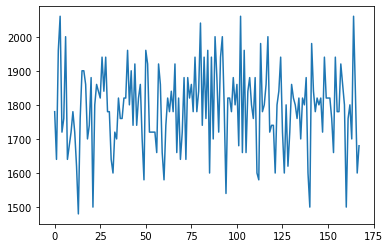

In [33]:
plt.plot(range(nepisode),episode_reward)

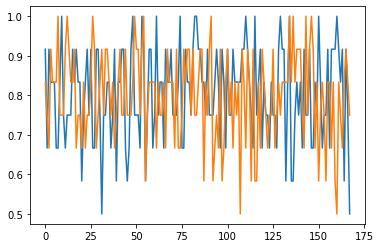

In [34]:
plt.plot(range(nepisode),agent_high_risky)
plt.plot(range(nepisode),agent_low_risky)

In [35]:
np.mean(agent_high_risky)

0.8065476190476191

In [36]:
df = pd.read_csv('./fakedata.csv')

In [44]:
df

,idx,block,stimuli,reward,response,trialtype
0,0.0,0.0,yellow/blue,80.0,blue,catch
1,0.0,0.0,yellow/red,60.0,red,catch
2,0.0,0.0,blue/red,40.0,blue,decision
3,0.0,0.0,yellow/green,0.0,green,decision
4,0.0,0.0,blue/green,40.0,blue,catch
...,...,...,...,...,...,...
6715,27.0,5.0,blue/red,40.0,blue,decision
6716,27.0,5.0,green/yellow,20.0,yellow,decision
6717,27.0,5.0,blue/green,40.0,blue,catch
6718,27.0,5.0,green/yellow,0.0,green,decision


In [38]:
agent_expectation

{'blue': 57.27563173767632,
 'green': 5.388143395013641,
 'red': 60.0,
 'yellow': 20.0}

In [39]:
agent_current_count

{'blue': [1390, 1333],
 'green': [928, 944],
 'red': [1456, 0],
 'yellow': [669, 0]}

In [40]:
agent_current_prob

{'blue': [0.5104663973558575, 0.4895336026441425],
 'green': [0.49572649572649574, 0.5042735042735043],
 'red': [1.0, 0.0],
 'yellow': [1.0, 0.0]}

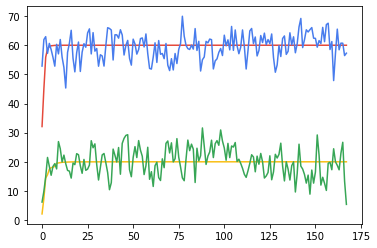

In [41]:
color1 = "#487ced"
color2 = "#e5493b"
color3 = "#37a656"
color4 = "#f9be14"
plt.plot(range(nepisode),agent_expectation_yellow,color =  color4)
plt.plot(range(nepisode),agent_expectation_green, color = color3)
plt.plot(range(nepisode),agent_expectation_red, color =  color2)
plt.plot(range(nepisode),agent_expectation_blue,color = color1)

<BarContainer object of 168 artists>

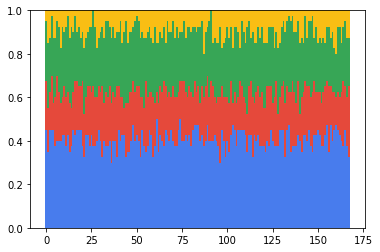

In [42]:
width = 1
plt.bar(range(nepisode),agent_prob_blue, width = width,color = color1)
plt.bar(range(nepisode),agent_prob_red, bottom = np.array(agent_prob_blue), width = width, color =  color2)
plt.bar(range(nepisode),agent_prob_green, bottom = np.array(agent_prob_blue) + np.array(agent_prob_red),width = width, color = color3)
plt.bar(range(nepisode),agent_prob_yellow, bottom = np.array(agent_prob_green) + np.array(agent_prob_blue) + np.array(agent_prob_red),width = width, color =  color4)


<BarContainer object of 1 artists>

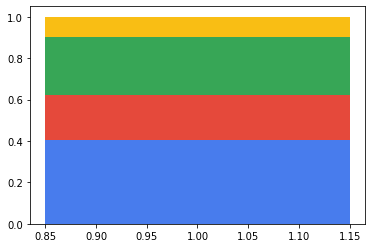

In [43]:
width = 0.3
plt.bar(x = 1,height = np.mean(agent_prob_blue), width = width,color = color1)
plt.bar(x = 1,height = np.mean(agent_prob_red), bottom = np.mean(agent_prob_blue), width = width, color = color2)
plt.bar(x = 1,height = np.mean(agent_prob_green), bottom = np.mean(agent_prob_blue) + np.mean(agent_prob_red),width = width, color = color3)
plt.bar(x = 1,height = np.mean(agent_prob_yellow), bottom = np.mean(agent_prob_green) + np.mean(agent_prob_blue) + np.mean(agent_prob_red),width = width, color =  color4)